In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class LinearRegression:
    def __init__(self, X=None, Y=None, epochs=1000, learn_rate=0.001,
                 reg_L1=0, reg_L2=0):
        """
        It is assumed that your input data comes with the dummy variable included (if needed), 
        data has  been separated already between Training, Validation, and Test sets, 
        and data is ready to be manipulated with your target variable well-defined.
        """
        
        self.X = X
        self.Y = Y
        self.N, self.D = self.X.shape
        self.K = len(self.Y.T)
        self.J = []
        
        self.epochs = epochs
        self.learn_rate = learn_rate
        self.reg_L1 = reg_L1
        self.reg_L2 = reg_L2
        
        self.init_weights()

    def init_weights(self):
       
        self.w = np.random.randn(self.D, self.K)
        
    def OLS(self, N=None):
        self.error = (1/(2*self.N))*(self.Y - self.Y_hat).dot(self.Y - self.Y_hat)
        self.J.append(self.error)
        
    def predictions(self, Y_hat=None):
        self.Y_hat = self.X.dot(self.w)
        
        
    def update_weights(self):
        self.w -= self.learn_rate * (self.X.T.dot(self.Y_hat - self.Y) + (self.reg_L1 * np.sign(self.w)) + (self.reg_L2 * self.w))
    
    
    def linear_prediction(self):
        for t in range(self.epochs):
            self.Y_hat = self.X.dot(self.w)
                        
            self.error = (1/(2*self.N))*(self.Y - self.Y_hat).dot(self.Y - self.Y_hat)
            self.J.append(self.error)
            
            self.w -= self.learn_rate * (1/self.N) * (self.X.T.dot(self.Y_hat - self.Y) + (self.reg_L1 * np.sign(self.w)) + (self.reg_L2 * self.w))
 
        
            
    def R2(self):
        self.R2 = 1 - np.sum((self.Y - self.Y_hat)**2) / np.sum((self.Y - self.Y.mean())**2)
        return self.R2
    
    def plot_error(self):
        plt.title("Prediction Error")
        plt.plot(self.J)
        plt.ylabel("OLS")
        plt.xlabel("Iteration")
        plt.show()
        
    
    def plot_predictions(self):

        plt.title("Targets vs. Predictions")
        plt.plot(self.Y_hat, label="Predictions")
        plt.plot(self.Y, label="Target")
        plt.xlabel("Sample number")
        plt.legend()
        plt.show()
           

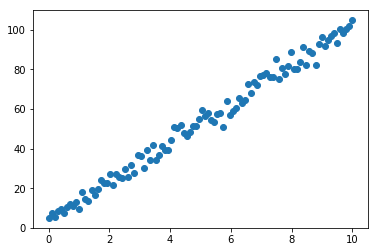

In [18]:
N = 100

X = np.linspace(0, 10, N)
PHI = np.vstack((np.array([1]*N), X)).T
w_true = np.array([3.9, 9.9])

Y = PHI.dot(w_true) + np.random.randn(N)*3

plt.scatter(X, Y)

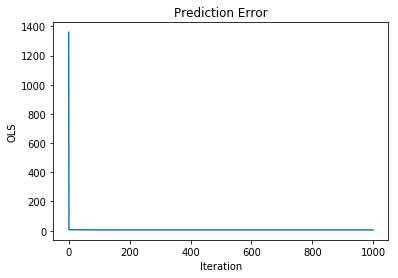

In [19]:
example1 = LinearRegression(PHI, Y,1000,0.03)

example1.init_weights()

example1.linear_prediction()
example1.R2()
example1.plot_error()

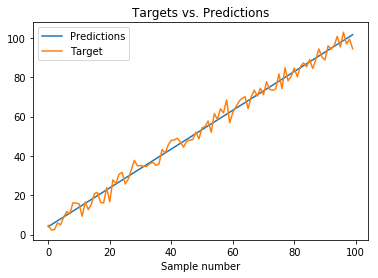

In [13]:
example1.plot_predictions()